# Feature engineering - exploration

#### Maria Silva, Feb. 2025

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
file_name = os.path.abspath("../data/features/2025-01-01.csv")
raw_df = pd.read_csv(file_name)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626967 entries, 0 to 626966
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   hash                       626967 non-null  object 
 1   arrival_time               626967 non-null  object 
 2   gas                        626967 non-null  float64
 3   gas_tip_cap                626967 non-null  float64
 4   gas_fee_cap                626967 non-null  float64
 5   data_size                  626967 non-null  float64
 6   inclusion_delay_ms         626967 non-null  float64
 7   included_at_block_height   626967 non-null  int64  
 8   prev_block_time            626967 non-null  object 
 9   prev_block_height          626967 non-null  int64  
 10  inclusion_delay_blocks     626967 non-null  int64  
 11  lag_1_block_size_bytes     626967 non-null  int64  
 12  lag_1_block_gas_used       626967 non-null  int64  
 13  lag_1_block_blob_gas_used  62

In [3]:
explore_df = raw_df.copy()
explore_df["arrival_time"] = pd.to_datetime(explore_df["arrival_time"])
explore_df["arrival_hour"] = explore_df["arrival_time"].dt.hour
explore_df["gas_tip_cap"] = explore_df["gas_tip_cap"]*1e-9
explore_df["gas_fee_cap"] = explore_df["gas_fee_cap"]*1e-9
explore_df["inclusion_delay_blocks_str"] = np.where(
    explore_df["inclusion_delay_blocks"]>3, "4+", explore_df["inclusion_delay_blocks"].astype(str)
    )

In [4]:
pred_df = explore_df.copy()
pred_df = pred_df.drop(columns=[
    'arrival_time','inclusion_delay_ms', 'included_at_block_height', 'prev_block_time', 
    'prev_block_height', 'inclusion_delay_blocks', 'arrival_hour', 'hash', 
    ])

## Analysis - Inclusion delay

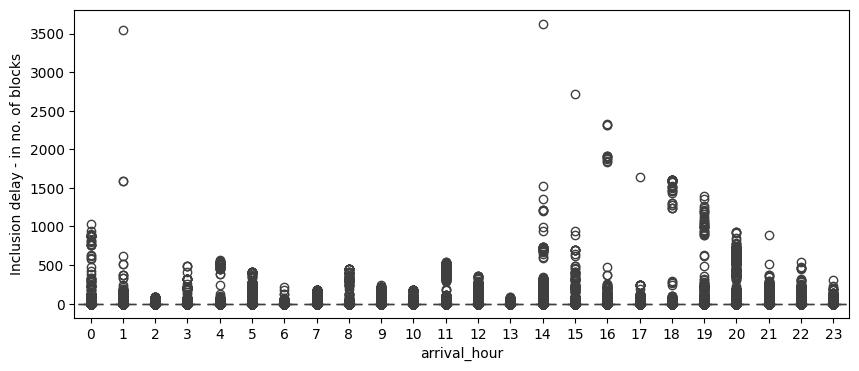

In [5]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df, x="arrival_hour", y="inclusion_delay_blocks")
plt.ylabel('Inclusion delay - in no. of blocks')
plt.show()

In [6]:
(
    explore_df
    .groupby("inclusion_delay_blocks")
    .size()
    /len(raw_df)
).head(10)

inclusion_delay_blocks
1     0.895597
2     0.055815
3     0.011546
4     0.005796
5     0.003802
6     0.002810
7     0.002168
8     0.001839
9     0.001434
10    0.001254
dtype: float64

In [7]:
(
    explore_df["inclusion_delay_blocks_str"]
    .value_counts()
    .sort_index()
    /len(raw_df)
)

inclusion_delay_blocks_str
1     0.895597
2     0.055815
3     0.011546
4+    0.037042
Name: count, dtype: float64

## Analysis - Fee caps (gas & priority)

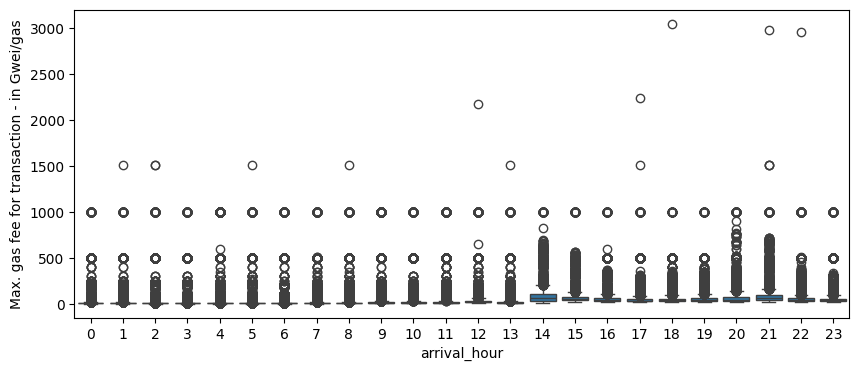

In [8]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df, x="arrival_hour", y="gas_fee_cap")
plt.ylabel('Max. gas fee for transaction - in Gwei/gas')
plt.show()

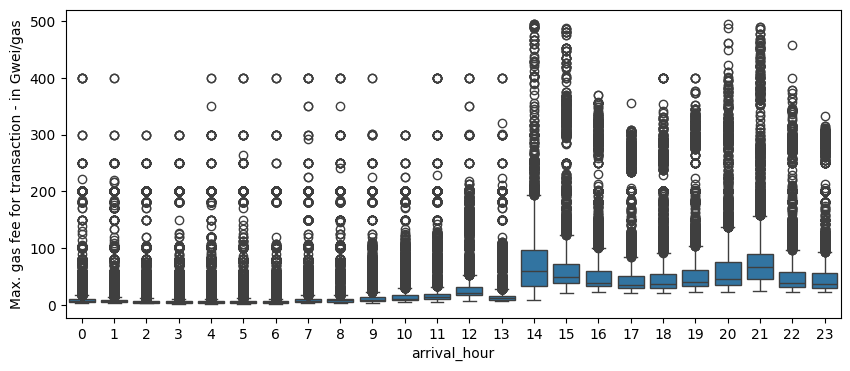

In [9]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df[explore_df["gas_fee_cap"]<500], x="arrival_hour", y="gas_fee_cap")
plt.ylabel('Max. gas fee for transaction - in Gwei/gas')
plt.show()

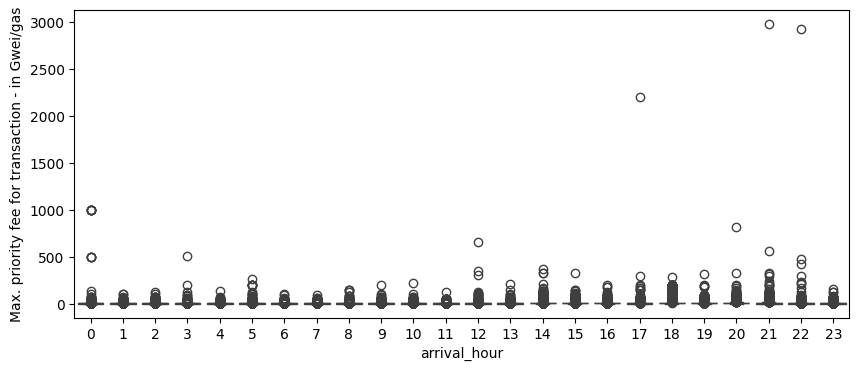

In [10]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df, x="arrival_hour", y="gas_tip_cap")
plt.ylabel('Max. priority fee for transaction - in Gwei/gas')
plt.show()

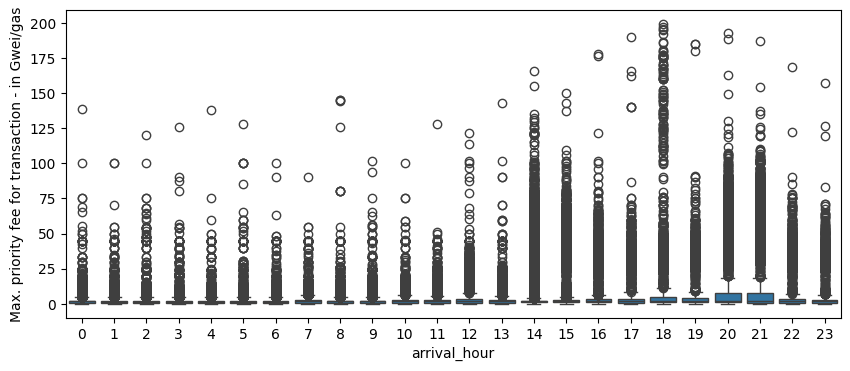

In [11]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df[explore_df["gas_tip_cap"]<200], x="arrival_hour", y="gas_tip_cap")
plt.ylabel('Max. priority fee for transaction - in Gwei/gas')
plt.show()

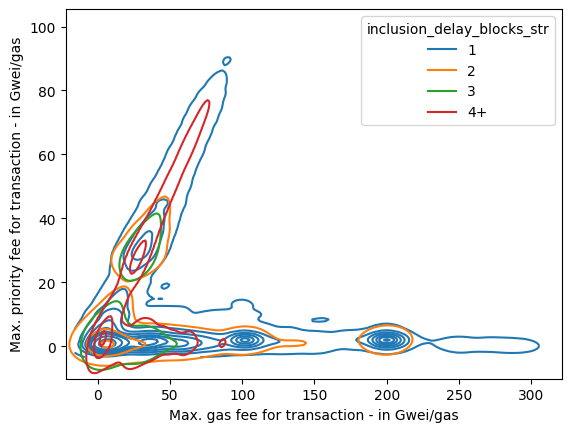

In [12]:
temp_df = (
    explore_df[(explore_df["gas_fee_cap"]<300) & (explore_df["gas_tip_cap"]<100)]
    .copy()
    .sort_values("inclusion_delay_blocks")
)
sns.kdeplot(
    data=temp_df,
    x="gas_fee_cap",
    y="gas_tip_cap",
    hue="inclusion_delay_blocks_str",
    thresh=.01,
)
plt.xlabel('Max. gas fee for transaction - in Gwei/gas')
plt.ylabel('Max. priority fee for transaction - in Gwei/gas')
plt.show()

## Analysis - mempool state

In [15]:
explore_df.columns

Index(['hash', 'arrival_time', 'gas', 'gas_tip_cap', 'gas_fee_cap',
       'data_size', 'inclusion_delay_ms', 'included_at_block_height',
       'prev_block_time', 'prev_block_height', 'inclusion_delay_blocks',
       'lag_1_block_size_bytes', 'lag_1_block_gas_used',
       'lag_1_block_blob_gas_used', 'lag_1_block_tx_count',
       'lag_1_block_base_fee_gwei', 'lag_2_block_size_bytes',
       'lag_2_block_gas_used', 'lag_2_block_blob_gas_used',
       'lag_2_block_tx_count', 'lag_2_block_base_fee_gwei',
       'lag_3_block_size_bytes', 'lag_3_block_gas_used',
       'lag_3_block_blob_gas_used', 'lag_3_block_tx_count',
       'lag_3_block_base_fee_gwei', 'lag_4_block_size_bytes',
       'lag_4_block_gas_used', 'lag_4_block_blob_gas_used',
       'lag_4_block_tx_count', 'lag_4_block_base_fee_gwei',
       'lag_5_block_size_bytes', 'lag_5_block_gas_used',
       'lag_5_block_blob_gas_used', 'lag_5_block_tx_count',
       'lag_5_block_base_fee_gwei', 'mem_total_gas_limit',
       'mem_tot

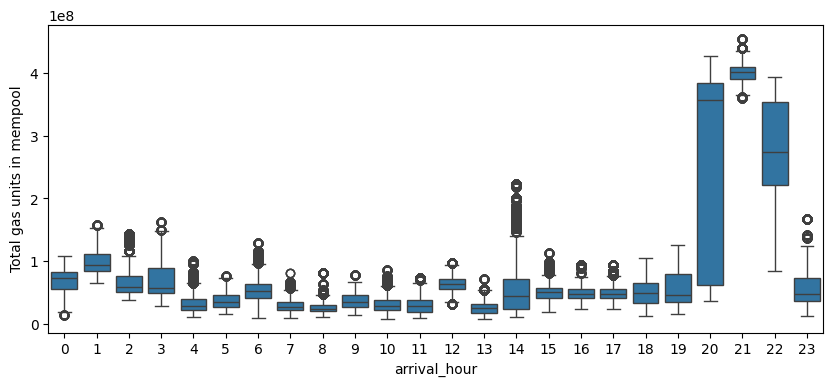

In [16]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df, x="arrival_hour", y="mem_total_gas_limit")
plt.ylabel('Total gas units in mempool')
plt.show()

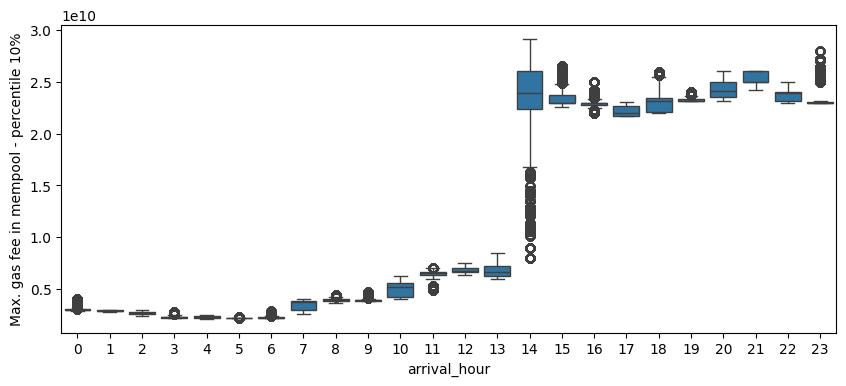

In [17]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df, x="arrival_hour", y="mem_gas_fee_cap_0.1")
plt.ylabel('Max. gas fee in mempool - percentile 10%')
plt.show()

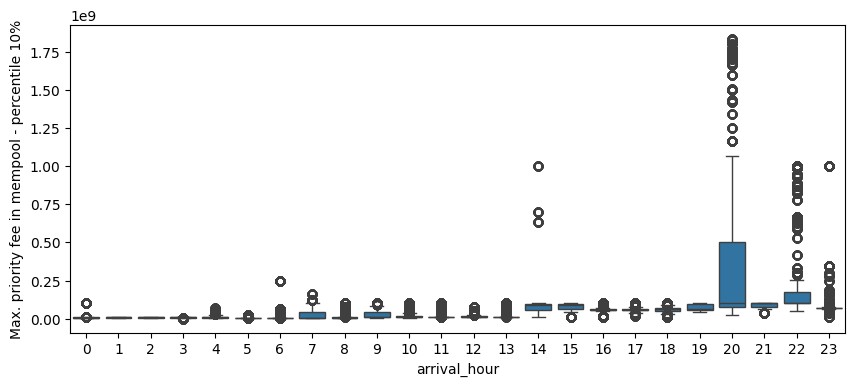

In [18]:
plt.figure(figsize=(10,4))
sns.boxplot(data=explore_df, x="arrival_hour", y="mem_gas_tip_cap_0.1")
plt.ylabel('Max. priority fee in mempool - percentile 10%')
plt.show()

## Feature correlation

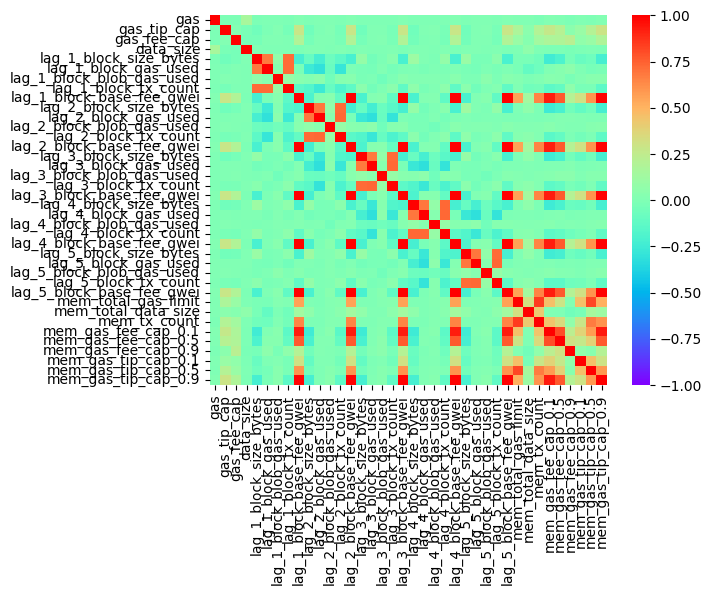

In [14]:
corr = pred_df.drop(columns=["inclusion_delay_blocks_str"]).corr(method='pearson')
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, vmin=-1, vmax=1, cmap="rainbow")
plt.show()